In [1]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from soynlp.tokenizer import LTokenizer
from soynlp.word import WordExtractor
from soynlp.noun import LRNounExtractor_v2

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
files = ['배우리프로_[team_wanna].json', '최남매_골프tv.json','프로랜서tv.json','프로허석[pro_golfer_heo].json', '박하림프로.json',
        '[골프맨]조윤성프로.json','김셩tv.json', '김현우프로[_wanna_golf_].json', '몬구골프.json','방프로_채널.json',
         '오지인tv.json','하와이골프_[박형준프로].json','홀인원tv.json','flow_golf최대룡.json', '유프로의_왕초보골프배우기.json',
         'dougkoh_channel.json','닥치고스윙_김준년프로.json','[이기호프로]이지골프스튜디오.json','이종훈의2%골프.json',
         '최프로의_처음부터_풀스윙.json','스윙tv.json','스윙닥터김남기프로.json','박치우프로[park’s_golf].json','m_club_golf.json',
         'donglegolf.json','뽈때리는tv.json', '스카이72_드림골프레인지hpga_골프아카데미.json','안소영프로_about_golf.json',
         '이병옥_골프학교_okswing_golf_academy.json', '[하우투골프]이정은4.json'] 

# all youtube data as of Aug 14, 2020
# '배재희프로의오늘의골프.json' invalid data of this json file causes error resulting in exclusion.

df_frame={}
frames = []
for file in files:
    data = None
    with open(file, 'r') as f:
        data=json.load(f)

    channel_id, stats = data.popitem()
    video_stats = stats['video_data']

    video_data = []
    for vid in video_stats.items():
        video_id = vid[0]
        title = vid[1]['title']
        views = int(vid[1]['viewCount'])
        #likes = int(vid[1]['likeCount'])
        #dislikes = int(vid[1]['dislikeCount'])
        #comments = int(vid[1]['commentCount'])
        release = vid[1]['publishedAt']
        video_data.append([title, views, release, file[:-5]])

    video = pd.DataFrame(video_data, columns=['title','viewCount', 'release', 'channel'])
    video['release'] = video['release'].apply(lambda x: x[:10])
    video['release'] = pd.to_datetime(video['release'])
    df_frame[file] = video
    frames.append(df_frame[file])

video = pd.concat(frames)
video['viewCount/day'] = video['viewCount'] / ((pd.to_datetime('today') - video['release']).dt.days)
# video.astype({'viewCount/day':'int32'})
video['viewCount/day'] = video['viewCount/day'].astype('int')
video['estimated income'] = video['viewCount'] * 2
video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4996 entries, 0 to 141
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             4996 non-null   object        
 1   viewCount         4996 non-null   int64         
 2   release           4996 non-null   datetime64[ns]
 3   channel           4996 non-null   object        
 4   viewCount/day     4996 non-null   int64         
 5   estimated income  4996 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 273.2+ KB


In [3]:
video.set_index('title', inplace=True)

## 가입자수(2020 Aug 04 ~ Aug 06 데이타 기반)

In [4]:

#sc = pd.DataFrame(subscriber_count, columns = ['channel', 'subscriber'])
#sc.set_index('channel', inplace=True)
#sc['subscriber'] = sc['subscriber'].astype('int')
#sc.sort_values('subscriber', ascending=False)

## Channel별 요약


In [5]:
channel_summary = video.groupby('channel').sum().sort_values('viewCount' ,ascending=False) # 누적조회수기준 정렬
channel_summary

,viewCount,viewCount/day,estimated income
channel,,,
김현우프로[_wanna_golf_],29528401,60395,59056802
[이기호프로]이지골프스튜디오,26663246,155930,53326492
[골프맨]조윤성프로,24573011,157844,49146022
donglegolf,21744702,31102,43489404
이병옥_골프학교_okswing_golf_academy,20961587,70777,41923174
하와이골프_[박형준프로],17464274,144385,34928548
프로허석[pro_golfer_heo],14430392,179203,28860784
flow_golf최대룡,13265485,51696,26530970
닥치고스윙_김준년프로,12836703,71711,25673406


In [6]:
video.groupby('channel').sum().sort_values('viewCount/day' ,ascending=False) # 누적일평균 조회수 정렬

,viewCount,viewCount/day,estimated income
channel,,,
프로허석[pro_golfer_heo],14430392,179203,28860784
몬구골프,9963464,165066,19926928
[골프맨]조윤성프로,24573011,157844,49146022
[이기호프로]이지골프스튜디오,26663246,155930,53326492
하와이골프_[박형준프로],17464274,144385,34928548
유프로의_왕초보골프배우기,8585377,118494,17170754
스윙닥터김남기프로,7286991,93537,14573982
닥치고스윙_김준년프로,12836703,71711,25673406
이병옥_골프학교_okswing_golf_academy,20961587,70777,41923174


## 누적 조회수 기준 상위 10 동영상 제목

In [7]:
video.sort_values('viewCount', ascending=False).head(10) 

,viewCount,release,channel,viewCount/day,estimated income
title,,,,,
"힘뺏더니 300M? 장타의 기본!! 골프그립, 손목에 힘빼는방법!! [엠클럽골프]",1772068,2019-04-21,m_club_golf,3684,3544136
"[ 워너 골프 ] 아이언 기본과 잘치는 방법 / 뒷땅, 탑볼 방지 / Hit Solid Iron Shots",1751355,2017-01-13,김현우프로[_wanna_golf_],1337,3502710
G투어프로가 알려주는 스크린 퍼팅공식! 이것만 알면 스크린 고수! [동글이골프TV],1289591,2018-01-02,donglegolf,1350,2579182
돈주고도 못배우는 드라이버 스윙기본기!! 시선처리와 에이밍까지 한번에! driver swing [동글이골프TV],1190222,2018-06-18,donglegolf,1510,2380444
"[골프레슨]드라이버 힘은 '이렇게' 쓰는 겁니다 (비거리, 방향 모두 좋아집니다)",1127247,2020-01-30,하와이골프_[박형준프로],5722,2254494
페어웨이우드 잘 칠수있는 의외의 체크포인트!,1091680,2019-02-06,이병옥_골프학교_okswing_golf_academy,1966,2183360
똑바로 멀리치려면? 아이언샷 백스윙 코킹 힌지 골프스윙동영상 아이언샷 잘치는법,1090369,2019-12-28,[이기호프로]이지골프스튜디오,4740,2180738
[골프맨] 드라이버 스윙 스피드를 위한 4가지 절대 조건,1089012,2020-06-13,[골프맨]조윤성프로,17564,2178024
[골프맨] 몸통스윙 핵심 3단계 연결하면 나도 몸통스윙 고수가 된다 / 자막 (한글/영어),1051258,2019-11-18,[골프맨]조윤성프로,3893,2102516


## 동영상별 등록일 보정 평균 조회수 기준 상위 10위

비거리 관련이 조회수 상위를 거의 석권하는 것으로 보임  
배재희프로, 몬구골프의 개별 동영상 상승이 돋보임
최근일자 등록영상이 유리함. 

In [8]:
video.sort_values('viewCount/day', ascending=False).head(10) 

,viewCount,release,channel,viewCount/day,estimated income
title,,,,,
"무조건 외우세요! 실전에 꼭 필요한 연습방법, 돌리고 붙인다!",80461,2020-08-12,유프로의_왕초보골프배우기,40230,160922
백스윙후 트랜지션 잘하기 위한 골프 이미지 트레이닝 | 실전 골프 스윙 트랜지션 타이밍 느낌잡는 연습 [골프레슨] mongu golf,28035,2020-08-13,몬구골프,28035,56070
"주변 고수들은 모두 ""이 방법으로"" 회전 합니다 오전 8시30분 출근길레슨 허석프로",50559,2020-08-12,프로허석[pro_golfer_heo],25279,101118
[이기호프로] 아이언스윙 눌러치기 끝판왕! 골프스윙궤도 샬로윙&다운블로,150689,2020-08-08,[이기호프로]이지골프스튜디오,25114,301378
[골프맨] 전환을 확실히 알아야 고수가 됩니다,148691,2020-08-08,[골프맨]조윤성프로,24781,297382
[골프레슨] 드라이버 튕겨주는 방법을 알면 300m 칩니다,83047,2020-08-10,하와이골프_[박형준프로],20761,166094
백스윙과 트랜지션의 숨겨진 비밀 | 트랜지션 타이밍 잡고 싶다면 그네 탈때를 기억하면 쉽게 할 수 있어요_몬구싸부 배예진프로 [골프레슨] mongu golf,77101,2020-08-10,몬구골프,19275,154202
[골프레슨] 드라이버 언제 던지는지 알면 편하게 30m 증가합니다 !!,467151,2020-07-20,하와이골프_[박형준프로],18686,934302
[골프맨] 드라이버 스윙 스피드를 위한 4가지 절대 조건,1089012,2020-06-13,[골프맨]조윤성프로,17564,2178024


## 똑바로 비거리 쉽게 던지는 동영상이 주류

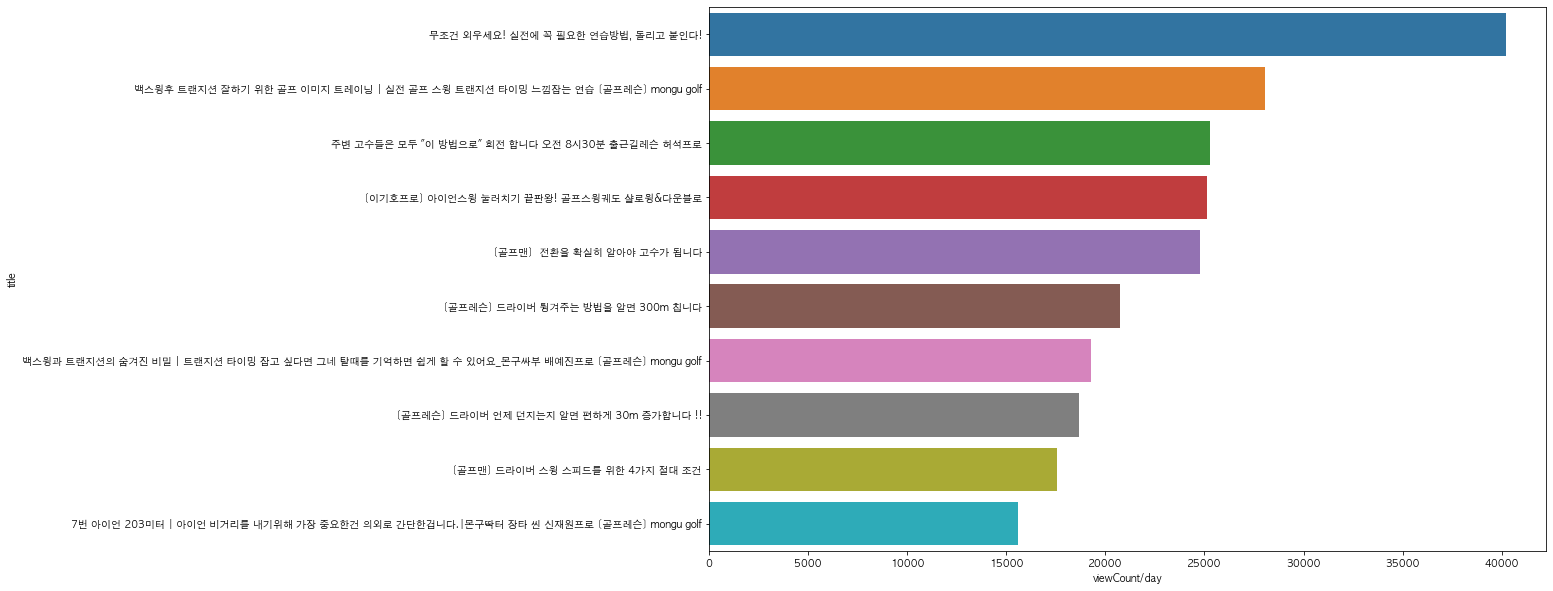

In [9]:
plt.figure(figsize=(15,10))
video_reset_index = video.reset_index()
sns.barplot(x='viewCount/day', y='title', data=video_reset_index.sort_values('viewCount/day', ascending=False)[:10])

In [10]:
df = video.reset_index()
df = df[['title', 'viewCount', 'channel', 'viewCount/day']].sort_values('viewCount', ascending=False)

In [11]:
df['refined'] = df['title'].apply(lambda x:re.sub('[^가-힣\s0-9]', '', x))

In [12]:
sentences = df['refined'].values


word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sentences) # list of str or like
words = word_extractor.extract()



cohesion_score = {word:score.cohesion_forward for word, score in words.items()}


noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(sentences) # list of str like

noun_scores = {noun:score.score for noun, score in nouns.items()}
combined_scores = {noun:score + cohesion_score.get(noun, 0)
    for noun, score in noun_scores.items()}
combined_scores.update(
    {subword:cohesion for subword, cohesion in cohesion_score.items()
    if not (subword in combined_scores)}
)

tokenizer = LTokenizer(scores=combined_scores)

training was done. used memory 0.171 Gbry 0.147 Gb
all cohesion probabilities was computed. # words = 161
all branching entropies was computed # words = 7264
all accessor variety was computed # words = 7264
[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 14251 from 4996 sents. mem=0.172 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=42524, mem=0.192 Gb
[Noun Extractor] batch prediction was completed for 4468 words
[Noun Extractor] checked compounds. discovered 1872 compounds
[Noun Extractor] postprocessing detaching_features : 3154 -> 2839
[Noun Extractor] postprocessing ignore_features : 2839 -> 2782
[Noun Extractor] postprocessing ignore_NJ : 2782 -> 2777
[Noun Extractor] 2777 nouns (1872 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.199 Gb                    
[Noun Extra

In [13]:
df['tokenized'] = df['refined'].apply(lambda x:tokenizer.tokenize(x,remove_r=True))

In [14]:
# 20%
thresh = int(len(df) *0.2)
df20 = df[:thresh]

In [15]:
words = []
for i in df20['tokenized']:
    for k in i:
        words.append(k)   

In [16]:
from collections import Counter
count = Counter(words)
word_dict = dict(count)

## 누적조회수 상위 20%에 많이 등장하는 단어 (상위25개만 display)
## (드라이버 멀리 비거리 아이언 똑바로 백스윙 몸통 다운스윙 장타 어프로치)

In [17]:
sort_orders = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)
shortened = sort_orders[:25]
for i in shortened:
	print(i[0], i[1])

골프 687
드라이버 241
스윙 141
방법 131
아이언 127
비거리 114
백스윙 107
연습 104
멀리 102
똑바로 80
다운스윙 75
프로 73
워너 66
몸통 66
쉽게 58
동글이골프 51
꼭 47
이렇게 42
임팩트 42
레슨 42
어프로치 41
이것 40
하는 40
수 39
장타 36


In [18]:
from wordcloud import WordCloud

In [19]:
stopword = {'골프', '허석프로', '출근길레슨', '박하림프', '하와이골프', '몬구', '조윤성', '오전8시30분', '워너', '김현우프로', 
            '방프로', '박형준프로', '8시30분', '오전', '3', '그리고', '프로', '영상', '30',
           '오전8시반', '출근길', '최대룡프', '김준년프로', '이기호프로', '닥치고스윙', '고덕호필드레슨', '고덕호초청필드레슨', '최민욱프로'}
for word in stopword:
    word_dict.pop(word)

In [20]:
wordcloud = WordCloud(font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc', width=500, height=500, background_color='white').generate_from_frequencies(word_dict)

## 누적조회수 상위 20%에 많이 등장하는 단어구름

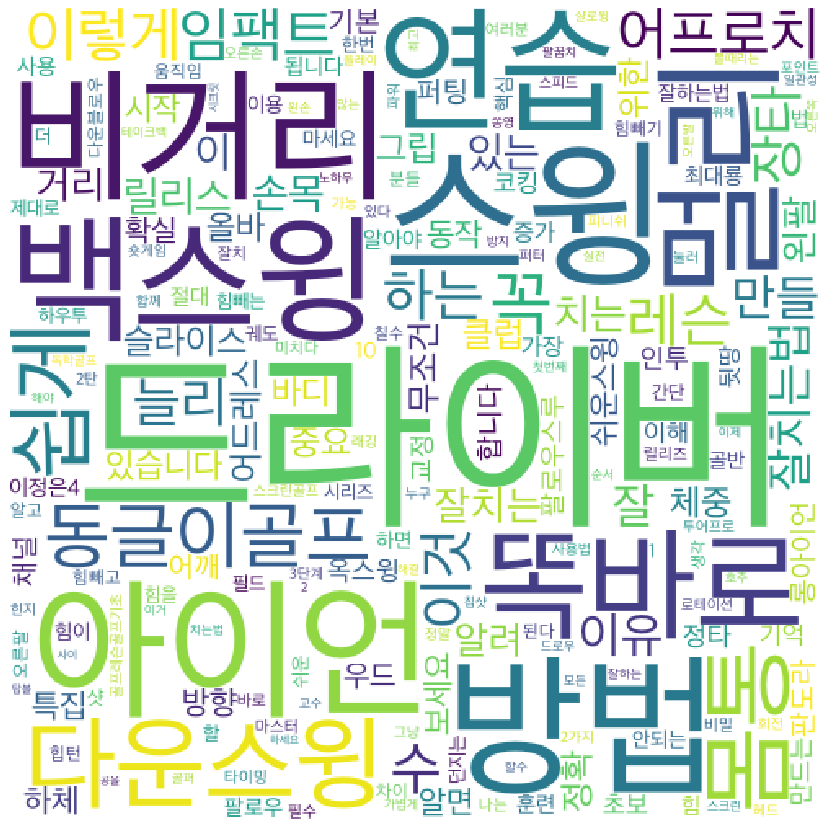

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
df20viewday = df.sort_values('viewCount/day', ascending=False)[:thresh]

In [23]:
words_perday = []
for i in df20viewday['tokenized']:
    for k in i:
        words_perday.append(k)   

In [24]:
from collections import Counter
count = Counter(words_perday)
word_dict_perday = dict(count)

## 등록일 보정 조회수 상위 20%에 많이 등장하는 단어 (상위25개만 디스플레이)
## (드라이버 멀리 아이언 똑바로 비거리 백스윙 몸통 다운스윙 장타 임팩 슬라이스)   
드라이버+비거리+멀리 + 장타 = 418 횟수 / 누적의 경우 같은 단어 조합이 369회...    
드라이버 멀리 치는 데 대한 관심도가 증가함을 알 수 있음. 

In [25]:
sort_orders = sorted(word_dict_perday.items(), key=lambda x: x[1], reverse=True)
shortened = sort_orders[:25]
for i in shortened:
	print(i[0], i[1])

골프 602
드라이버 261
스윙 151
방법 128
아이언 121
멀리 121
연습 120
비거리 112
백스윙 107
똑바로 91
프로 78
다운스윙 74
쉽게 63
레슨 61
몸통 58
꼭 53
수 52
닥치고스윙 51
이렇게 49
김준년프로 44
허석프로 43
임팩트 43
출근길레슨 41
이유 41
이것 41


In [26]:
stopword = {'골프', '허석프로', '출근길레슨', '박하림프', '하와이골프', '몬구', '조윤성', '오전8시30분', '워너', '김현우프로', 
            '방프로', '박형준프로', '8시30분', '오전', '3', '그리고', '프로', '영상', '30',
           '오전8시반', '출근길', '김준년프로', '이기호프로', '최대룡프', '고덕호초청필드레슨', '독학골프', '김정연의', '닥치고스윙'}
for word in stopword:
    word_dict_perday.pop(word)

In [27]:
wordcloud = WordCloud(font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc', width=500, height=500, background_color='white').generate_from_frequencies(word_dict_perday)

## 등록일 보정 누적 조회수 상위 20%에 많이 등장하는 단어구름

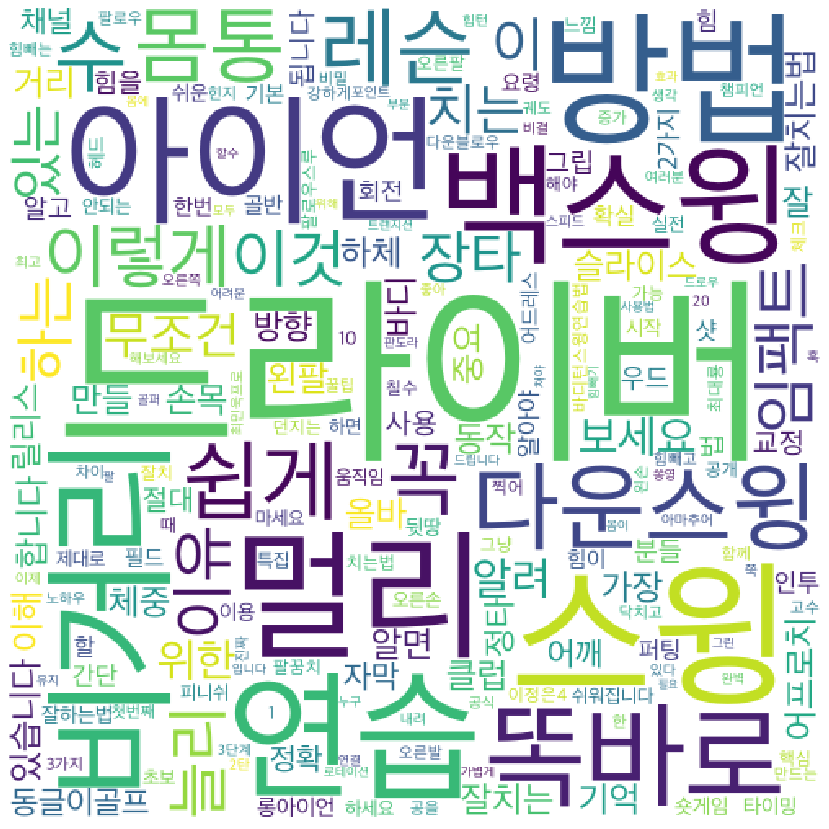

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
words = []
for i in df['tokenized']:
    for k in i:
        words.append(k)   

from collections import Counter
count = Counter(words)
keywords = dict(count)

In [30]:
keywords_item = ['드라이버', '아이언', '퍼터', '우드','퍼팅', '어드레스', '테이크백', '테이크어웨이', '코킹', '힌지',
                '백스윙', '스웨이', '체중', '다운스윙', '임팩', '피니쉬', '피니시', '슬라이스', '훅', '드로우', 
                 '페이드','왼팔', '오른팔',  '팔꿈치',  '머리', '비거리', '멀리', '똑바로', '생크', '오른손', '왼손', '손목', '벙커샷', 
                 '뒷땅', '릴리스','로테이션', '퍼팅', '쌩크', '팔로우', '상체', '하체', '드릴']

## 주요 주제어 등장 횟수 (전체 동영상 대비 %)
조회수가 높은 만큼 실제 드라이버, 비거리, 멀리 등의 주제어로 많은 동영상을 제작하고 있음

In [31]:
keyword_dict ={}
for item in keywords_item:
    keyword_dict[item] = keywords[item]

sort_orders = sorted(keyword_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
    percent = i[1]/len(df)*100
    print(i[0], i[1], f'   {percent:.1f}%')

드라이버 740    14.8%
비거리 467    9.3%
백스윙 435    8.7%
아이언 404    8.1%
다운스윙 239    4.8%
슬라이스 199    4.0%
멀리 192    3.8%
똑바로 172    3.4%
어드레스 122    2.4%
퍼팅 110    2.2%
체중 108    2.2%
하체 100    2.0%
릴리스 74    1.5%
손목 73    1.5%
피니쉬 61    1.2%
우드 58    1.2%
코킹 53    1.1%
왼팔 53    1.1%
뒷땅 48    1.0%
드로우 44    0.9%
퍼터 43    0.9%
훅 40    0.8%
오른팔 37    0.7%
오른손 37    0.7%
벙커샷 34    0.7%
팔로우 33    0.7%
왼손 29    0.6%
팔꿈치 26    0.5%
상체 24    0.5%
머리 23    0.5%
로테이션 23    0.5%
테이크백 22    0.4%
페이드 20    0.4%
테이크어웨이 18    0.4%
힌지 15    0.3%
생크 14    0.3%
스웨이 13    0.3%
드릴 13    0.3%
임팩 12    0.2%
피니시 12    0.2%
쌩크 11    0.2%


### 추가작업(시간날때): 주제어별 기대 조회수 계산하기

In [32]:
total_viewCount = df['viewCount'].sum()
for item in keywords_item:
    keyword_viewCount = df[df['tokenized'].apply(lambda x: item in x)]['viewCount'].sum()
    print(item, '  ', keyword_viewCount, f'   {keyword_viewCount/total_viewCount*100:.1f}%')

드라이버    64432792    21.7%
아이언    33749035    11.4%
퍼터    1367313    0.5%
우드    5360177    1.8%
퍼팅    5014755    1.7%
어드레스    4794625    1.6%
테이크백    1071411    0.4%
테이크어웨이    653817    0.2%
코킹    4388881    1.5%
힌지    3360038    1.1%
백스윙    24593450    8.3%
스웨이    324734    0.1%
체중    4841600    1.6%
다운스윙    16730725    5.6%
임팩    759146    0.3%
피니쉬    2123078    0.7%
피니시    454128    0.2%
슬라이스    9000977    3.0%
훅    858776    0.3%
드로우    1968794    0.7%
페이드    425337    0.1%
왼팔    8084026    2.7%
오른팔    2422380    0.8%
팔꿈치    1993081    0.7%
머리    853313    0.3%
비거리    31082278    10.5%
멀리    31129105    10.5%
똑바로    28471201    9.6%
생크    375627    0.1%
오른손    1784319    0.6%
왼손    1591620    0.5%
손목    8372398    2.8%
벙커샷    794731    0.3%
뒷땅    4384121    1.5%
릴리스    8613117    2.9%
로테이션    1527558    0.5%
퍼팅    5014755    1.7%
쌩크    537736    0.2%
팔로우    2755644    0.9%
상체    1390137    0.5%
하체    4975644    1.7%
드릴    302663    0.1%


In [33]:
df_bin = []

for i in sort_orders:
    percent = i[1]/len(df)*100
    keyword_viewCount = df[df['tokenized'].apply(lambda x: i[0] in x)]['viewCount'].sum()
    print(i[0], i[1], f'   {percent:.1f}%', keyword_viewCount, f'   {keyword_viewCount/total_viewCount*100:.1f}%')
    list_temp = [i[0], i[1], percent, keyword_viewCount, keyword_viewCount/total_viewCount*100]
    df_bin.append(list_temp)

드라이버 740    14.8% 64432792    21.7%
비거리 467    9.3% 31082278    10.5%
백스윙 435    8.7% 24593450    8.3%
아이언 404    8.1% 33749035    11.4%
다운스윙 239    4.8% 16730725    5.6%
슬라이스 199    4.0% 9000977    3.0%
멀리 192    3.8% 31129105    10.5%
똑바로 172    3.4% 28471201    9.6%
어드레스 122    2.4% 4794625    1.6%
퍼팅 110    2.2% 5014755    1.7%
체중 108    2.2% 4841600    1.6%
하체 100    2.0% 4975644    1.7%
릴리스 74    1.5% 8613117    2.9%
손목 73    1.5% 8372398    2.8%
피니쉬 61    1.2% 2123078    0.7%
우드 58    1.2% 5360177    1.8%
코킹 53    1.1% 4388881    1.5%
왼팔 53    1.1% 8084026    2.7%
뒷땅 48    1.0% 4384121    1.5%
드로우 44    0.9% 1968794    0.7%
퍼터 43    0.9% 1367313    0.5%
훅 40    0.8% 858776    0.3%
오른팔 37    0.7% 2422380    0.8%
오른손 37    0.7% 1784319    0.6%
벙커샷 34    0.7% 794731    0.3%
팔로우 33    0.7% 2755644    0.9%
왼손 29    0.6% 1591620    0.5%
팔꿈치 26    0.5% 1993081    0.7%
상체 24    0.5% 1390137    0.5%
머리 23    0.5% 853313    0.3%
로테이션 23    0.5% 1527558    0.5%
테이크백 22    0.4% 1071411    0

In [34]:
keyword_df = pd.DataFrame(df_bin, columns=['주제어', '등장회수', '등장비중', '누적조회수', '조회수비중'])

In [35]:
keyword_df['비중차이(조회수비중-등장비중)'] = keyword_df['조회수비중'] - keyword_df['등장비중']
keyword_df.sort_values('비중차이(조회수비중-등장비중)', ascending=False)

,주제어,등장회수,등장비중,누적조회수,조회수비중,비중차이(조회수비중-등장비중)
0,드라이버,740,14.811849,64432792,21.669339,6.857490
6,멀리,192,3.843074,31129105,10.469004,6.625929
7,똑바로,172,3.442754,28471201,9.575126,6.132372
3,아이언,404,8.086469,33749035,11.350110,3.263641
17,왼팔,53,1.060849,8084026,2.718732,1.657883
12,릴리스,74,1.481185,8613117,2.896670,1.415485
13,손목,73,1.461169,8372398,2.815714,1.354545
1,비거리,467,9.347478,31082278,10.453255,1.105777
4,다운스윙,239,4.783827,16730725,5.626696,0.842869
34,힌지,15,0.300240,3360038,1.130012,0.829771


Text(0.5, 0, '비중 %')

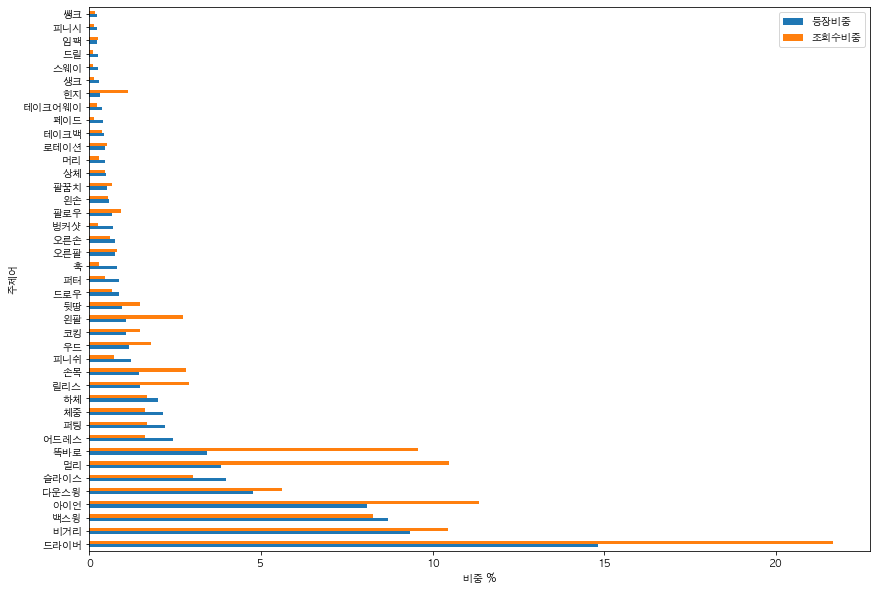

In [36]:
keyword_df.set_index('주제어')[['등장비중', '조회수비중']].plot(kind='barh', figsize=(14, 10))
plt.xlabel('비중 %')